In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
df = pd.read_csv('Automobile.csv')
print(df.head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'Automobile.csv'

In [ ]:
print("Sütun İsimleri:", df.columns)

Sütun İsimleri: Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')


In [ ]:
min_values = df.min()
max_values = df.max()
min_values = df.min()
max_values = df.max()

print("En küçük değerler:\n", min_values)
print("En büyük değerler:\n", max_values)

En küçük değerler:
 name            amc ambassador brougham
mpg                                 9.0
cylinders                             3
displacement                       68.0
horsepower                         46.0
weight                             1613
acceleration                        8.0
model_year                           70
origin                           europe
dtype: object
En büyük değerler:
 name            vw rabbit custom
mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                 230.0
weight                      5140
acceleration                24.8
model_year                    82
origin                       usa
dtype: object


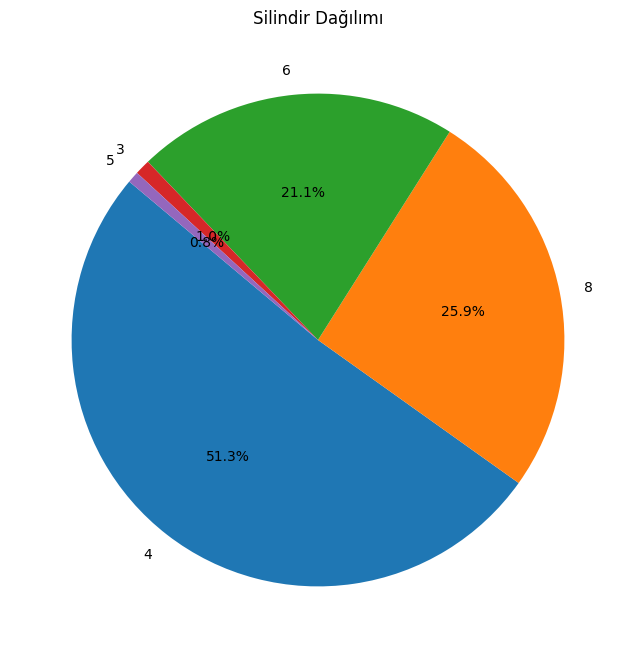

<ipython-input-14-c009aad28fa7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_year', y='mpg', data=avg_mpg_year, palette='viridis')


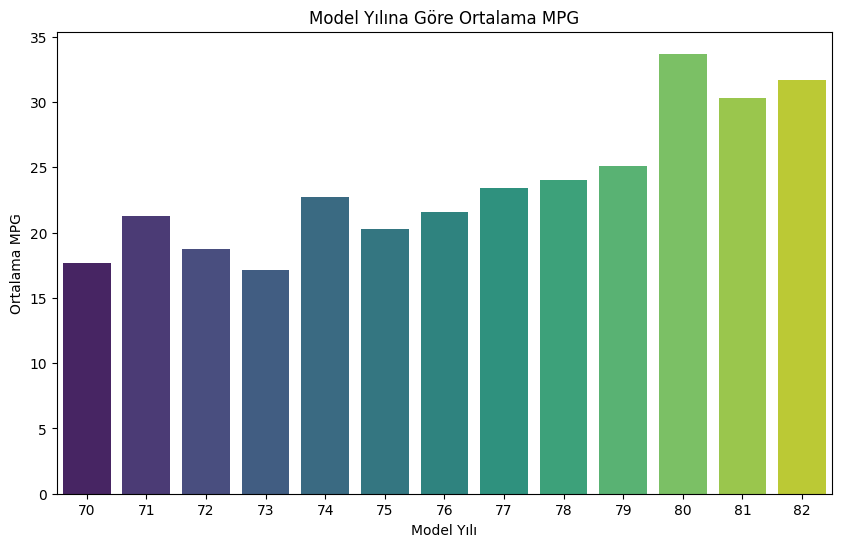

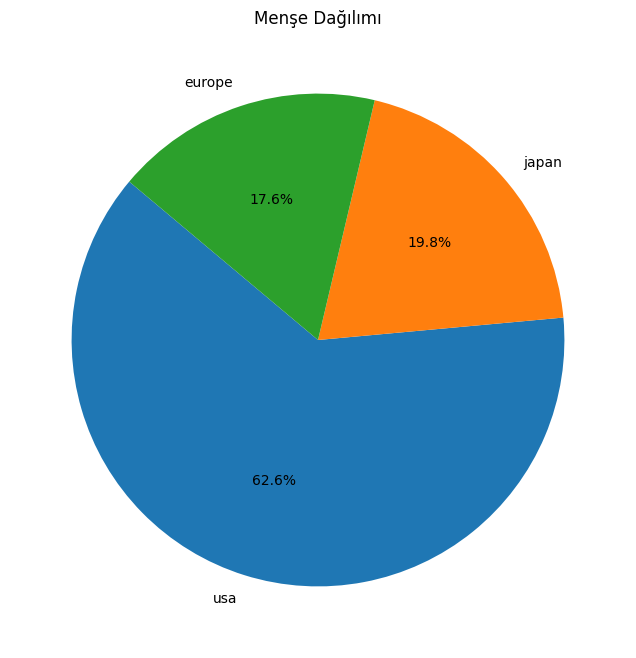

<ipython-input-14-c009aad28fa7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cylinders', y='horsepower', data=avg_hp_cyl, palette='magma')


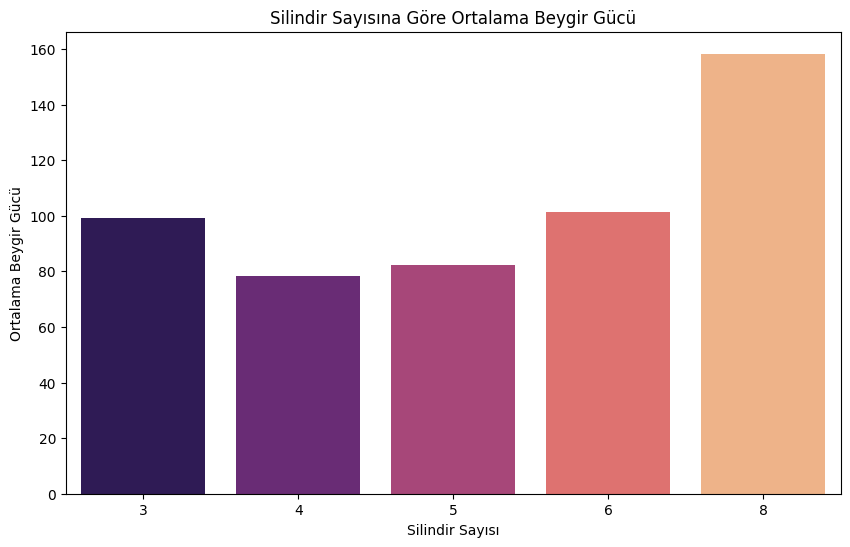

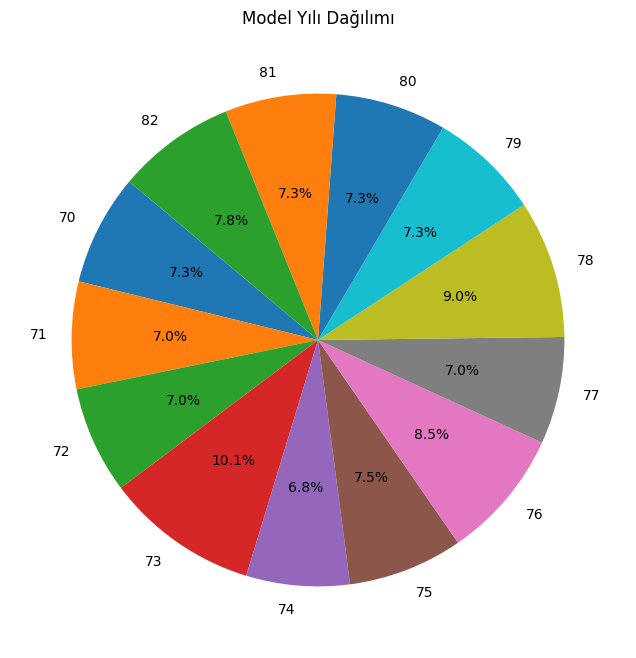

<ipython-input-14-c009aad28fa7>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_year', y='weight', data=avg_weight_year, palette='Set2')


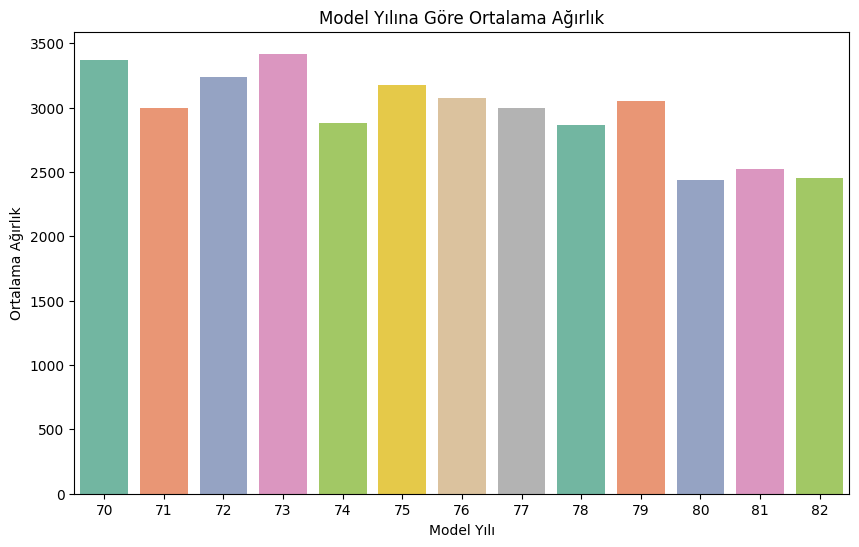

In [ ]:
# -----------------------------------------------------
# Grafik 1 (Pasta Grafiği): Silindir Dağılımı
# -----------------------------------------------------
plt.figure(figsize=(8,8))
cylinder_counts = df['cylinders'].value_counts()
plt.pie(cylinder_counts, labels=cylinder_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Silindir Dağılımı')
plt.show()

# -----------------------------------------------------
# Grafik 2 (Çubuk Grafiği): Model Yılına Göre Ortalama MPG
# -----------------------------------------------------
plt.figure(figsize=(10,6))
avg_mpg_year = df.groupby('model_year')['mpg'].mean().reset_index()
sns.barplot(x='model_year', y='mpg', data=avg_mpg_year, palette='viridis')
plt.title('Model Yılına Göre Ortalama MPG')
plt.xlabel('Model Yılı')
plt.ylabel('Ortalama MPG')
plt.show()

# -----------------------------------------------------
# Grafik 3 (Pasta Grafiği): Menşe Dağılımı
# -----------------------------------------------------
plt.figure(figsize=(8,8))
origin_counts = df['origin'].value_counts()
plt.pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Menşe Dağılımı')
plt.show()

# -----------------------------------------------------
# Grafik 4 (Çubuk Grafiği): Silindir Sayısına Göre Ortalama Beygir Gücü
# -----------------------------------------------------
plt.figure(figsize=(10,6))
avg_hp_cyl = df.groupby('cylinders')['horsepower'].mean().reset_index()
sns.barplot(x='cylinders', y='horsepower', data=avg_hp_cyl, palette='magma')
plt.title('Silindir Sayısına Göre Ortalama Beygir Gücü')
plt.xlabel('Silindir Sayısı')
plt.ylabel('Ortalama Beygir Gücü')
plt.show()

# -----------------------------------------------------
# Grafik 5 (Pasta Grafiği): Model Yılı Dağılımı
# -----------------------------------------------------
plt.figure(figsize=(8,8))
model_year_counts = df['model_year'].value_counts().sort_index()
plt.pie(model_year_counts, labels=model_year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Model Yılı Dağılımı')
plt.show()

# -----------------------------------------------------
# Grafik 6 (Çubuk Grafiği): Model Yılına Göre Ortalama Ağırlık
# -----------------------------------------------------
plt.figure(figsize=(10,6))
avg_weight_year = df.groupby('model_year')['weight'].mean().reset_index()
sns.barplot(x='model_year', y='weight', data=avg_weight_year, palette='Set2')
plt.title('Model Yılına Göre Ortalama Ağırlık')
plt.xlabel('Model Yılı')
plt.ylabel('Ortalama Ağırlık')
plt.show()



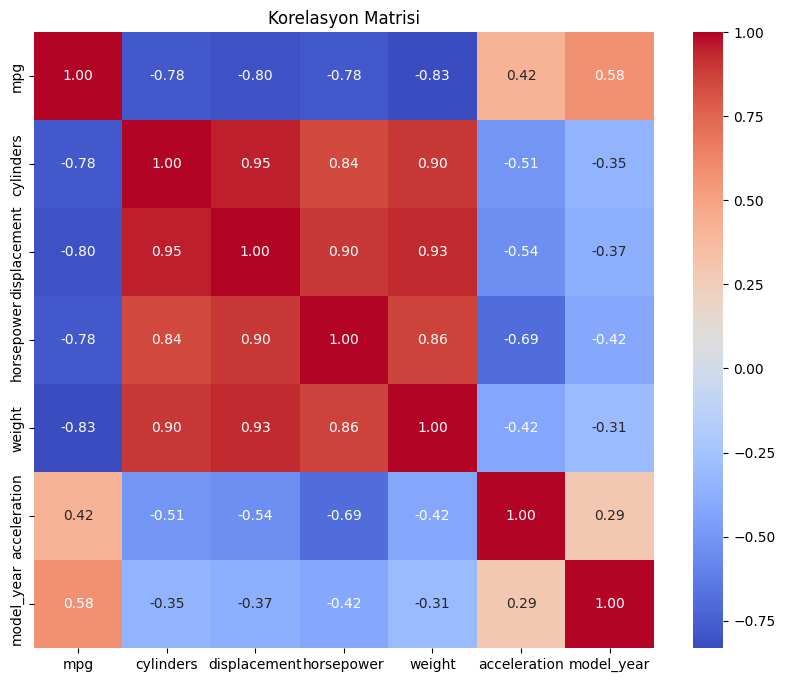

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number)
correlation = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Replace 'x1', 'x2', 'x3', and 'target' with actual column names from your DataFrame
X = df[['horsepower', 'weight', 'acceleration']]  # Example: Using horsepower, weight, and acceleration as predictors
y = df['mpg']  # Example: Using mpg as the target variable

# --- The Fix ---
# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with any missing values
X = X.dropna()
y = y[X.index] # Align y with X after dropping rows
# --- End of Fix ---

X = sm.add_constant(X)  # Add a constant term to the model

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          7.48e-103
Time:                        10:11:18   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.6783      2.409     18.965   

<ipython-input-21-bce4942da4fe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Katsayılar:", model.coef_)
print("R2 Skoru:", r2_score(y, y_pred))
print("Hata (MSE):", mean_squared_error(y, y_pred))

Katsayılar: [ 0.         -0.04749562 -0.0057894  -0.00206566]
R2 Skoru: 0.7063754859981903
Hata (MSE): 17.841429544544027


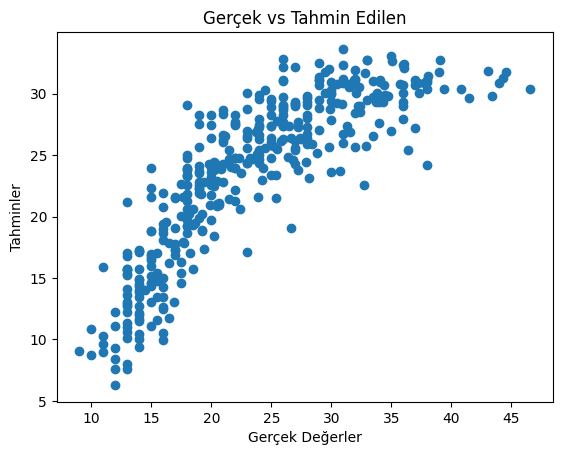

In [ ]:
plt.scatter(y, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek vs Tahmin Edilen")
plt.show()